<a href="https://colab.research.google.com/github/shuklasuraj1000/Assignment/blob/main/Assignment_13_NOV_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

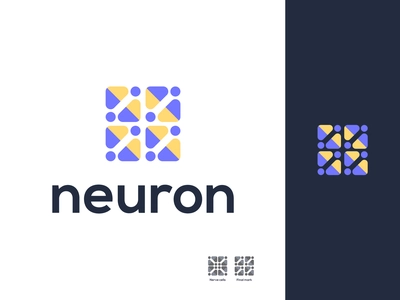


**College admission dataset**

> **Life cycle of Machine learning Project**
1.   Data ingestion
2.   EDA
3.   FE
4.   ML Model
5.   Validation

> **Source:**
1.   ***URL:*** https://raw.githubusercontent.com/shuklasuraj1000/EDA_DATA/main/Census_Income_Data_Set.csv













**Import Data and Required Packages**

`Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.`

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

**Import the CSV Data from Git as Pandas DataFrame**

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/shuklasuraj1000/EDA_DATA/main/Census_Income_Data_Set.csv")

**Exploring schemas/Features**

In [3]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Earning
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


**Shape and Size of Data**

In [4]:
df.shape

(48842, 15)

**Checking data tpye and checking null**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48842 non-null  object
 14  Earning         48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


**Quick observation for outlier:**

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,48842.0,38.643585,13.710510,17.0,28.0,37.0,48.0,90.0
fnlwgt,48842.0,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
education-num,48842.0,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
capital-gain,48842.0,1079.067626,7452.019058,0.0,0.0,0.0,0.0,99999.0
capital-loss,48842.0,87.502314,403.004552,0.0,0.0,0.0,0.0,4356.0
hours-per-week,48842.0,40.422382,12.391444,1.0,40.0,40.0,45.0,99.0


**Dropping Null row:**

In [7]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Earning           0
dtype: int64

In [8]:
for i in df.columns:
  print(" {} : {}".format(i,df[i].unique()))

 age : [39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87 89]
 workclass : [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
 fnlwgt : [ 77516  83311 215646 ... 173449  89686 350977]
 education : [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
 education-num : [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
 marital-status : [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
 occupation : [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farm

In [9]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'Earning'],
      dtype='object')

**Encoding:**

In [10]:
df['workclass']=df['workclass'].replace(' ?', df['workclass'].mode()[0])
df['occupation']=df['occupation'].replace(' ?', df['occupation'].mode()[0])
df['native-country']=df['native-country'].replace(' ?', df['native-country'].mode()[0])

In [11]:
df['sex']=df['sex'].replace({' Male':1, ' Female':0})
df['Earning']=df['Earning'].replace({' <=50K':0, ' >50K':1, ' <=50K.':0, ' >50K.':1 })

In [12]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Earning
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,1,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,0,40,Cuba,0


In [13]:
workclass=df['workclass'].value_counts().to_dict()
marital_status=df['marital-status'].value_counts().to_dict()
occupation=df['occupation'].value_counts().to_dict()
relationship=df['relationship'].value_counts().to_dict()
race=df['race'].value_counts().to_dict()
native_country=df['native-country'].value_counts().to_dict()


In [14]:
df['workclass']=df['workclass'].replace(workclass)
df['marital-status']=df['marital-status'].replace(marital_status)
df['occupation']=df['occupation'].replace(occupation)
df['relationship']=df['relationship'].replace(relationship)
df['race']=df['race'].replace(race)
df['native-country']=df['native-country'].replace(native_country)



In [15]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Earning
0,39,1981,77516,Bachelors,13,16117,5611,12583,41762,1,2174,0,40,44689,0
1,50,3862,83311,Bachelors,13,22379,6086,19716,41762,1,0,0,13,44689,0
2,38,36705,215646,HS-grad,9,6633,2072,12583,41762,1,0,0,40,44689,0
3,53,36705,234721,11th,7,22379,2072,19716,4685,1,0,0,40,44689,0
4,28,36705,338409,Bachelors,13,22379,8981,2331,4685,0,0,0,40,138,0


In [16]:
df.workclass

0         1981
1         3862
2        36705
3        36705
4        36705
         ...  
48837    36705
48838    36705
48839    36705
48840    36705
48841     1695
Name: workclass, Length: 48842, dtype: int64

**DATA FOR ANALYSIS:**

**Data feature segregation:**

In [17]:
dependent_feature=df['Earning']

independent_features=df.drop(['Earning', 'education'], axis=1)

In [18]:
independent_features.head(10)

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,1981,77516,13,16117,5611,12583,41762,1,2174,0,40,44689
1,50,3862,83311,13,22379,6086,19716,41762,1,0,0,13,44689
2,38,36705,215646,9,6633,2072,12583,41762,1,0,0,40,44689
3,53,36705,234721,7,22379,2072,19716,4685,1,0,0,40,44689
4,28,36705,338409,13,22379,8981,2331,4685,0,0,0,40,138
5,37,36705,284582,14,22379,6086,2331,41762,0,0,0,40,44689
6,49,36705,160187,5,628,4923,12583,4685,0,0,0,16,106
7,52,3862,209642,9,22379,6086,19716,41762,1,0,0,45,44689
8,31,36705,45781,14,16117,8981,12583,41762,0,14084,0,50,44689
9,42,36705,159449,13,22379,6086,19716,41762,1,5178,0,40,44689


**EXPLORING DATA**

In [167]:
#!pip install autoviz

# **ML MODEL BUILDING:**

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X=independent_features
X

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,1981,77516,13,16117,5611,12583,41762,1,2174,0,40,44689
1,50,3862,83311,13,22379,6086,19716,41762,1,0,0,13,44689
2,38,36705,215646,9,6633,2072,12583,41762,1,0,0,40,44689
3,53,36705,234721,7,22379,2072,19716,4685,1,0,0,40,44689
4,28,36705,338409,13,22379,8981,2331,4685,0,0,0,40,138
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,36705,215419,13,6633,8981,12583,41762,0,0,0,36,44689
48838,64,36705,321403,9,1518,8981,1506,4685,1,0,0,40,44689
48839,38,36705,374983,13,22379,8981,19716,41762,1,0,0,50,44689
48840,44,36705,83891,13,6633,5611,7581,1519,1,5455,0,40,44689


In [24]:
Y=dependent_feature
Y

0        0
1        0
2        0
3        0
4        0
        ..
48837    0
48838    0
48839    0
48840    0
48841    1
Name: Earning, Length: 48842, dtype: int64

**DATA splitting among Training and Test data:**

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

# **Model Training:**

# **DecisionTreeRegressor**

In [26]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

In [27]:
model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [28]:
model.score(X_train,Y_train)

0.9999388827771666

In [29]:
y_predict=model.predict(X_test)

In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_predict)

0.8079166149646358

**Hyper-parameter Tuining:**

In [71]:
grid_param = {
    'criterion': ['gini', 'entropy'],
    'splitter' : ['best', 'random'],
    'max_features' : ['auto', 'sqrt', 'log2']
    
}

In [72]:
from sklearn.model_selection import GridSearchCV
grid_searh=GridSearchCV(estimator=model,param_grid=grid_param,cv=5)

In [73]:
grid_searh.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']})

In [74]:
grid_searh.best_params_

{'criterion': 'entropy', 'max_features': 'sqrt', 'splitter': 'best'}

In [84]:
model_with_best_params=DecisionTreeClassifier(criterion= 'entropy',splitter='best', max_features= 'sqrt')

In [85]:
model_with_best_params.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_features='sqrt')

In [86]:
y_prediction2=model_with_best_params.predict(X_test)

In [87]:
accuracy_score(Y_test,y_prediction2)

0.811080779253009

## **Random Forest Classifier**

In [88]:
from sklearn.ensemble import RandomForestClassifier

In [93]:
clf = RandomForestClassifier()

In [94]:
clf.fit(X_train, Y_train)

RandomForestClassifier()

In [95]:
clf.score(X_train,Y_train)

0.9999388827771666

In [96]:
y_predict3=clf.predict(X_test)

In [97]:
accuracy_score(Y_test,y_predict3)

0.8556272490383422

**Hyper-parameter Tuining:**

In [107]:
grid_param = {
    'criterion': ['gini', 'entropy','log_loss'],
    'max_features': ['sqrt', 'log2']
    
}

In [108]:
grid_searh=GridSearchCV(estimator=clf,param_grid=grid_param,cv=5)
grid_searh.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['sqrt', 'log2']})

In [109]:
grid_searh.best_params_

{'criterion': 'entropy', 'max_features': 'log2'}

In [110]:
clf1 = RandomForestClassifier(criterion= 'entropy', max_features= 'log2')

In [111]:
clf1.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', max_features='log2')

In [112]:
clf1.score(X_train,Y_train)

0.9999083241657499

In [113]:
y_predict4=clf.predict(X_test)

In [114]:
accuracy_score(Y_test,y_predict4)

0.8556272490383422

**Observation: **

Hyper-parameter tuining making no sense, no impact at all.

# **Voting Classifier**

In [115]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
clf1 = LogisticRegression(multi_class='multinomial', random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()

eclf1 = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='soft')


In [116]:
eclf1 = eclf1.fit(X_train, Y_train)

In [117]:
eclf1 = eclf1.fit(X_train, Y_train)

In [118]:
y_predict8=eclf1.predict(X_test)

In [119]:
accuracy_score(Y_test,y_predict8)

0.8170988956446209

# **Bagging Classifier**

In [120]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

In [121]:
clf = BaggingClassifier(base_estimator=SVC(), n_estimators=10, random_state=0).fit(X_train, Y_train)

In [122]:
y_predict9=clf.predict(X_test)

In [123]:
accuracy_score(Y_test,y_predict9)

0.794329321255739

**Observation:**

Not good performance at all.

In [128]:
clf1 = BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion= 'entropy',splitter='best', max_features= 'sqrt'), n_estimators=10, random_state=0).fit(X_train, Y_train)

In [129]:
y_predict10=clf1.predict(X_test)

In [130]:
accuracy_score(Y_test,y_predict10)

0.8472515200397072

**Observation:**

Good performance similar to Random Forest.

# **Gradient Boosting Classifier**

In [131]:
from sklearn.ensemble import GradientBoostingClassifier

In [138]:
clf2 = GradientBoostingClassifier().fit(X_train, Y_train)

In [139]:
y_predict11=clf2.predict(X_test)

In [140]:
accuracy_score(Y_test,y_predict11)

0.8664846755180543

**Hyper-parameter tuining:**

In [141]:
grid_param = {
    'loss': ['log_loss', 'deviance', 'exponential'],
    'criterion' : ['friedman_mse', 'squared_error', 'mse'],
    'max_features' : ['auto', 'sqrt', 'log2']
    
}

In [143]:
grid_searh1=GridSearchCV(estimator=clf2,param_grid=grid_param,cv=5)

In [144]:
grid_searh1.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['friedman_mse', 'squared_error', 'mse'],
                         'loss': ['log_loss', 'deviance', 'exponential'],
                         'max_features': ['auto', 'sqrt', 'log2']})

In [145]:
grid_searh1.best_params_

{'criterion': 'friedman_mse', 'loss': 'deviance', 'max_features': 'auto'}

In [146]:
clf3 = GradientBoostingClassifier(criterion= 'friedman_mse', loss= 'deviance', max_features= 'auto').fit(X_train, Y_train)

In [147]:
y_predict12=clf3.predict(X_test)

In [148]:
accuracy_score(Y_test,y_predict12)

0.8664846755180543

**Observation: **

No use of hyper-parameter tuining.